# Accelerated PCA Benchmark
Compare CPU and GPU implementations of PCA using a synthetic dataset.


Benchmarking n_samples=100000 ...
CUDA average: 0.859s
Sklearn PCA average: 3.077s

Benchmarking n_samples=200000 ...
CUDA average: 1.434s
Sklearn PCA average: 5.357s

Benchmarking n_samples=300000 ...
CUDA average: 2.000s
Sklearn PCA average: 7.828s


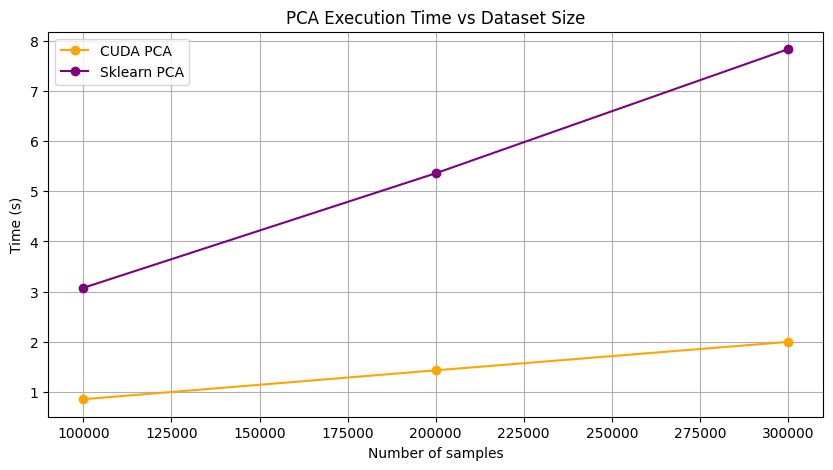

In [2]:
import time
import numpy as np
from accelerated_pca import PCA_CPU, PCA_CUDA, standardize
from sklearn.decomposition import PCA as SklearnPCA
import matplotlib.pyplot as plt

sample_sizes = [100_000, 200_000, 300_000]
n_features = 5000
n_components = 2
n_runs = 2

cpu_times_avg = []
cuda_times_avg = []
cuda_times_gpu_avg = []
sklearn_times_avg = []

pca_cpu = PCA_CPU(n_components=n_components)
pca_cuda = PCA_CUDA(n_components=n_components)

for n_samples in sample_sizes:
    print(f"\nBenchmarking n_samples={n_samples} ...")
    X = np.random.rand(n_samples, n_features).astype(np.float32)
    X_std = standardize(X)
    
    # ---- CUDA PCA ----
    cuda_times = []
    for _ in range(n_runs):
        start = time.time()
        X_cuda = pca_cuda.fit_transform(X_std)
        cuda_times.append(time.time() - start)
    cuda_avg = np.mean(cuda_times)
    cuda_times_avg.append(cuda_avg)
    print(f"CUDA average: {cuda_avg:.3f}s")

    # ---- sklearn PCA ----
    sklearn_times = []
    sk_pca = SklearnPCA(n_components=n_components)
    for _ in range(n_runs):
        start = time.time()
        X_skl = sk_pca.fit_transform(X_std)
        sklearn_times.append(time.time() - start)
    skl_avg = np.mean(sklearn_times)
    sklearn_times_avg.append(skl_avg)
    print(f"Sklearn PCA average: {skl_avg:.3f}s")

# ------------------------------
# Plot execution times
# ------------------------------
plt.figure(figsize=(10,5))
plt.plot(sample_sizes, cuda_times_avg, marker='o', label='CUDA PCA', color='orange')
plt.plot(sample_sizes, sklearn_times_avg, marker='o', label='Sklearn PCA', color='purple')
plt.xlabel("Number of samples")
plt.ylabel("Time (s)")
plt.title("PCA Execution Time vs Dataset Size")
plt.grid(True)
plt.legend()
plt.show()

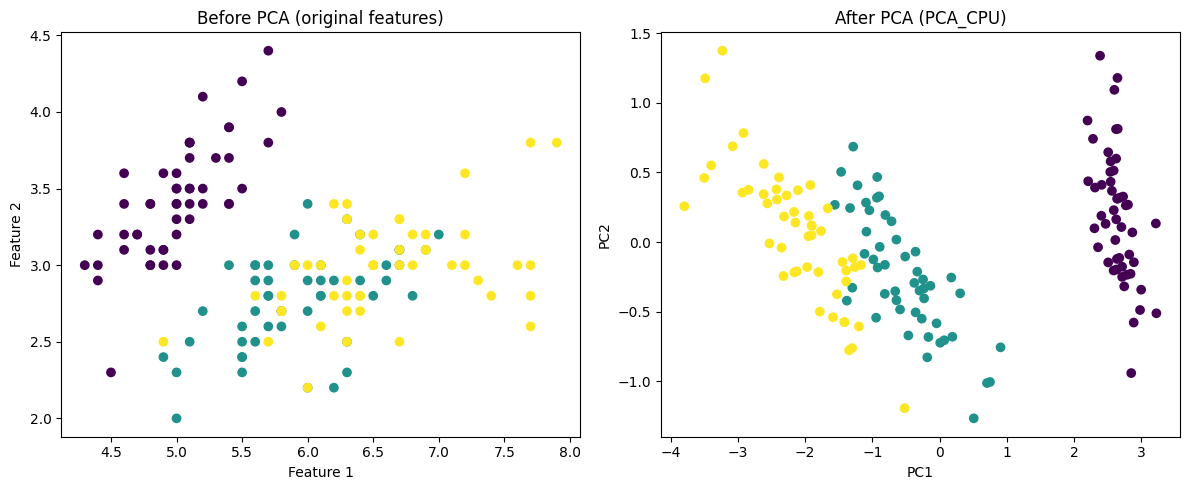

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from accelerated_pca import PCA_CPU

# Load Iris dataset
X, y = load_iris(return_X_y=True)

# Use the first 2 features for the "before PCA" plot
X_before = X[:, :2]

plt.figure(figsize=(12, 5))

# Plot before PCA
plt.subplot(1, 2, 1)
plt.scatter(X_before[:, 0], X_before[:, 1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Before PCA (original features)")

# Perform PCA using CPU
pca_cpu = PCA_CPU(n_components=2)
pca_cpu.fit(X)
X_pca_cpu = pca_cpu.transform(X)

# Plot after PCA
plt.subplot(1, 2, 2)
plt.scatter(X_pca_cpu[:, 0], X_pca_cpu[:, 1], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("After PCA (PCA_CPU)")

plt.tight_layout()
plt.show()

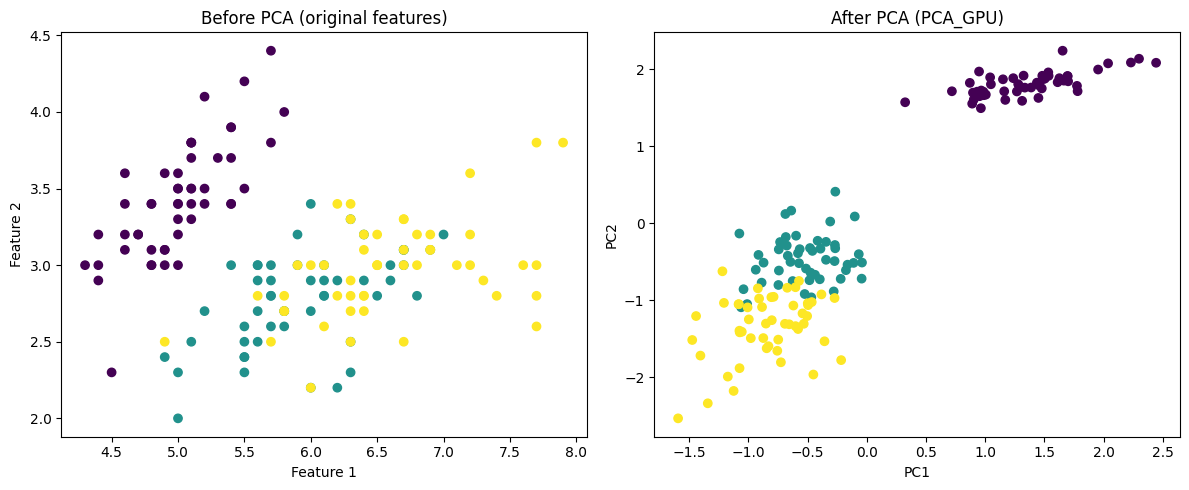

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from accelerated_pca import PCA_CUDA

# Load Iris dataset
X, y = load_iris(return_X_y=True)

# Use the first 2 features for the "before PCA" plot
X_before = X[:, :2]

plt.figure(figsize=(12, 5))

# Plot before PCA
plt.subplot(1, 2, 1)
plt.scatter(X_before[:, 0], X_before[:, 1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Before PCA (original features)")

# Perform PCA using GPU
pca_gpu = PCA_CUDA(n_components=2)
pca_gpu.fit(X)
X_pca_gpu = pca_gpu.transform(X)

# Plot after PCA
plt.subplot(1, 2, 2)
plt.scatter(X_pca_gpu[:, 0], X_pca_gpu[:, 1], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("After PCA (PCA_GPU)")

plt.tight_layout()
plt.show()